# Implementacja

### Importowanie bibliotek i własnego generatora

In [14]:

# from custom_random import rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

from generator import Generator

### Zmienne Stałe, Globalne

#### Parametry sygnału i zakres

In [15]:

CZAS_TRWANIA = 10  # sekundy
CZESTOTLIWOSC_PROBKOWANIA = 10000  # Hz

ZAKRES = (5, 10) # Liczby rzeczywiste

#### Obliczanie czasu trawania i generowanie szumu białego

In [16]:

LICZBA_PROBEK = CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA
print(f"Liczba próbek {LICZBA_PROBEK}")

#Stwórz obiket Generator
gen = Generator()
szum_bialy = gen.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

# Gotowy generator
#szum_bialy = np.random.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

Liczba próbek 100000


### Wykresy

#### Wykres czasowy szumu białego o rozkładzie równomiernym

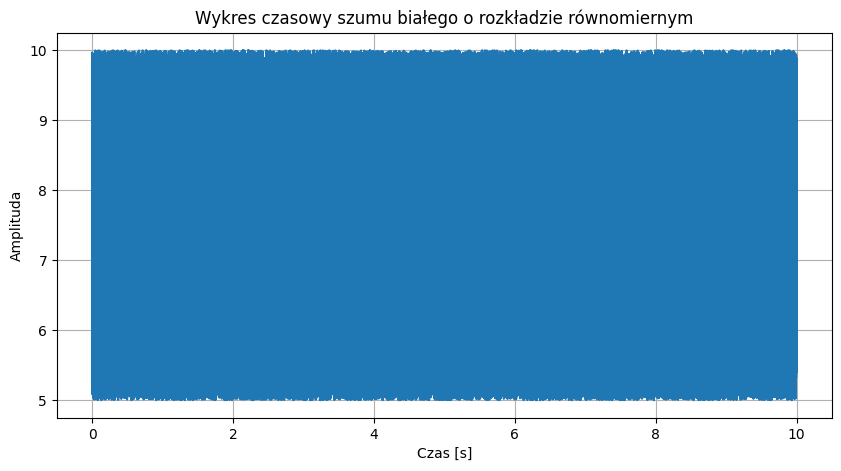

In [17]:

czas = np.linspace(0, CZAS_TRWANIA, LICZBA_PROBEK)
plt.figure(figsize=(10, 5))
plt.plot(czas, szum_bialy)
plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

### Przybliżony wykres czasowy szumu białego

Liczba próbek 100


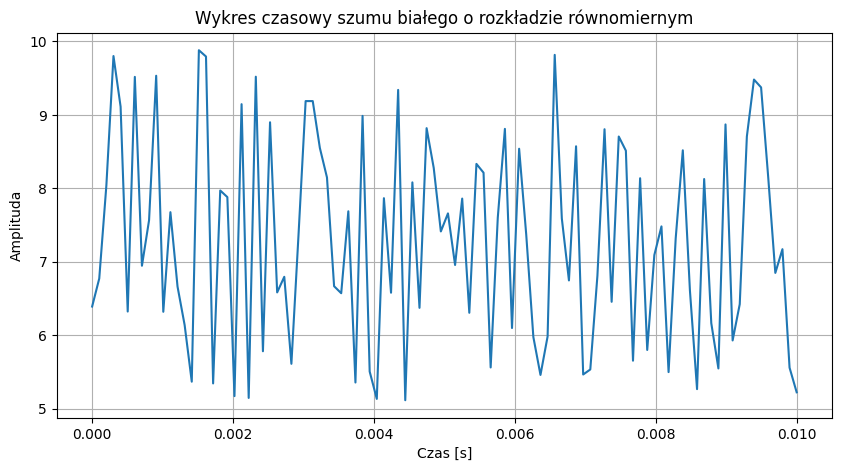

In [18]:

MALY_CZAS_TRWANIA = 0.01
MALA_LICZBA_PROBEK = int(MALY_CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA)
print(f"Liczba próbek {MALA_LICZBA_PROBEK}")

maly_szum = gen.uniform(ZAKRES[0], ZAKRES[1], MALA_LICZBA_PROBEK)

maly_czas = np.linspace(0, MALY_CZAS_TRWANIA, MALA_LICZBA_PROBEK)
plt.figure(figsize=(10, 5))
plt.plot(maly_czas, maly_szum)
plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

### Histogram

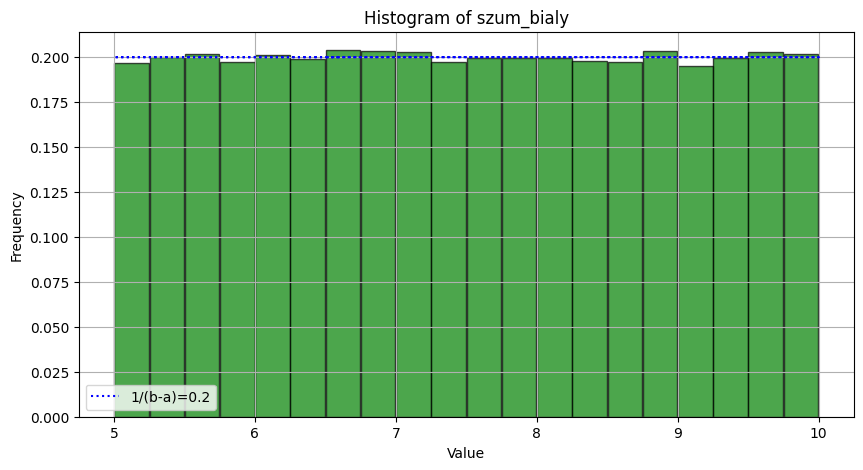

In [19]:
plt.figure(figsize=(10, 5))

x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', linestyle='dotted', label=f'1/(b-a)={1/(ZAKRES[1]-ZAKRES[0])}')


plt.hist(szum_bialy, bins=20, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
plt.title('Histogram of szum_bialy')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### Gęstość prawdopodobieństwa

In [20]:
#x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
#plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', label='1/(b-a)')
# Dodanie linii przerywanych na początku i końcu
#plt.vlines(ZAKRES[0], 0, uniform.pdf(ZAKRES[0], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')
#plt.vlines(ZAKRES[1], 0, uniform.pdf(ZAKRES[1], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')

#plt.legend()
#plt.grid(True)
#plt.show()

### Obliczanie dystrybuanty


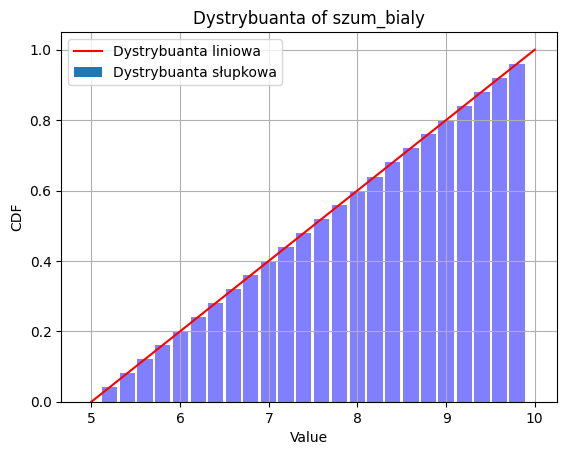

In [21]:
def wykresy_dystrybuanty(szum_bialy, liczba_slupkow=10, szerokosc_slupka=0.90):
    '''
    Funkcja generuje wykresy dystrybuanty dla szumu białego.
    :param szum_bialy: wygenerowany wcześniej szum biały
    :param liczba_slupkow: liczba słupków, domyślnie 10
    :param szerokosc_slupka: szerokość słupka, w przedziale 0.0 - 1.0 (domyślnie 0.9)
    :return: brak
    '''
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0])
    
    # Obliczanie kroku dla słupków X
    ilosc_probek = len(szum_bialy)
    krok = int(ilosc_probek / liczba_slupkow)
 
    # Sortowanie danych
    sorted_data = np.sort(szum_bialy)
    sorted_cdf = np.sort(cdf_values)
    
    # Obliczanie szerokości słupków
    width = (sorted_data[krok] - sorted_data[0]) * szerokosc_slupka  # 80% szerokości między pierwszym a drugim słupkiem
 
    # Tworzenie wykresu słupkowego dystrybuanty
    for i in range(0, LICZBA_PROBEK, krok):
        plt.bar(sorted_data[i], sorted_cdf[i], width=width, color='b', alpha=0.5)
        
    # Dodanie labela dla wszystkich słupków
    plt.bar([], [], color='b', alpha=0.5, label='Dystrybuanta słupkowa')
 
    # Tworzenie wykresu liniowego dla dystrybuanty
    plt.plot(sorted_data, sorted_cdf, 'r', label='Dystrybuanta liniowa')
    
    plt.title('Dystrybuanta of szum_bialy')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

wykresy_dystrybuanty(szum_bialy=szum_bialy, liczba_slupkow=25, szerokosc_slupka=0.85)

[0, 0.07602078672729287, 0.12562560965736577, 0.17574901524017045, 0.2257603129953956, 0.2757309701340732, 0.32495389344523606, 0.37434965939632725, 0.423893924023545, 0.47383625108169053, 0.524271730050072, 0.5745105546487291, 0.6244477170558393, 0.6748756531052305, 0.72567037366367, 0.7751523384113953, 0.8254266541257832, 0.8761576924328823, 0.9255941505354003, 1]



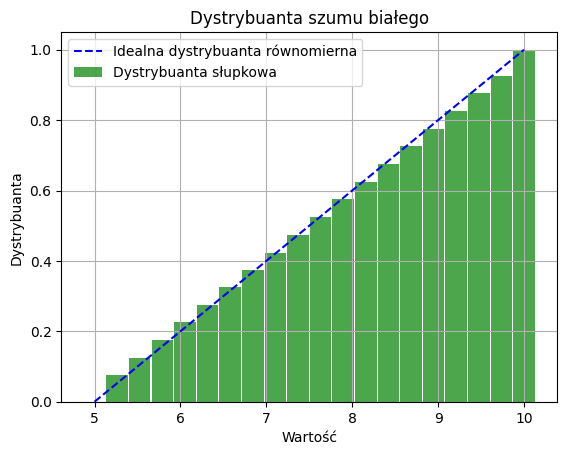

In [22]:
def avg(lst):
    return sum(lst) / len(lst)

def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20):
    '''
    Funkcja generuje wykres dystrybuanty słupkowej dla szumu białego.
    :param ilosc_slupkow: liczba słupków, domyślnie 20
    '''
    probki = np.sort(lista_probek)
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)
    
    krok = int(len(probki) / ilosc_slupkow)
    
    # Obliczanie wartości dystrybuanty w środkach słupków
    wartosci_dystrybuanty = [avg(sorted_cdf[i:i+krok]) for i in range(0, len(sorted_cdf)-krok, krok)]
    if len(wartosci_dystrybuanty) < ilosc_slupkow:
        wartosci_dystrybuanty.append(1)
    else:
        wartosci_dystrybuanty[-1] = 1  # Ustawienie ostatniej wartości na 1
    wartosci_dystrybuanty[0] =0
    print(wartosci_dystrybuanty)
    
    print()
    # Tworzenie wykresu słupkowego dystrybuanty
    plt.bar(np.linspace(zakres[0], zakres[1], ilosc_slupkow), wartosci_dystrybuanty, width=(zakres[1] - zakres[0]) / ilosc_slupkow, color='g', alpha=0.7, label='Dystrybuanta słupkowa')
    
    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
    idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')
        
    plt.title('Dystrybuanta szumu białego')
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.legend()
    plt.grid(True)
    plt.show()

#Stwórz obiket Generator
gen = Generator()
dystrybuanta_slupkowa(szum_bialy, ZAKRES, 20)


[0, 0.05056044229454671, 0.08451518346752881, 0.11744495393754101, 0.15034756650683045, 0.1842242548429648, 0.2173530429215778, 0.25070009988342656, 0.284108737838519, 0.3165946998529646, 0.3496978056961891, 0.38255953760117456, 0.4155732676227617, 0.44864197361864333, 0.4822449821619537, 0.515794738659345, 0.54944638033207, 0.5827667934028392, 0.6159759763454272, 0.6495698602461633, 0.6832430566031669, 0.7171861837990972, 0.7505474268714252, 0.7832761439576192, 0.8168064790817549, 0.8508813929531058, 0.8844304396761523, 0.9171284900791824, 0.9502882329937663, 1]


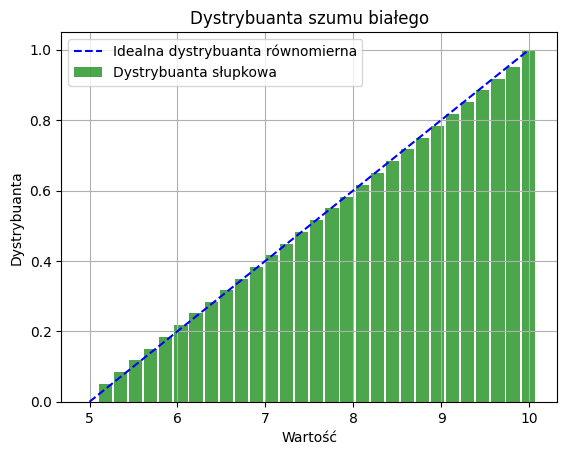

In [23]:
def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20):
    '''
    Funkcja generuje wykres dystrybuanty słupkowej dla szumu białego.
    :param ilosc_slupkow: liczba słupków, domyślnie 20
    '''
    probki = np.sort(lista_probek)
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)
    
    krok = len(probki) // ilosc_slupkow
    
    # Obliczanie wartości dystrybuanty w środkach słupków
    wartosci_dystrybuanty = [avg(sorted_cdf[i:i+krok]) for i in range(0, len(sorted_cdf)-krok, krok)]
    if len(wartosci_dystrybuanty) < ilosc_slupkow:
        wartosci_dystrybuanty.append(1)
    else:
        wartosci_dystrybuanty[-1] = 1  # Ustawienie ostatniej wartości na 1
    wartosci_dystrybuanty[0] = 0
    print(wartosci_dystrybuanty)
    
    # Tworzenie wykresu słupkowego dystrybuanty
    plt.bar(np.linspace(zakres[0]+0.01, zakres[1]-0.01, ilosc_slupkow), wartosci_dystrybuanty, width=0.15, color='g', alpha=0.7, label='Dystrybuanta słupkowa')
    
    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
    idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')
        
    plt.title('Dystrybuanta szumu białego')
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.legend()
    plt.grid(True)
    plt.show()

# Wywołanie funkcji
dystrybuanta_slupkowa(szum_bialy, ZAKRES, 30)

In [24]:
import pandas as pd

K = [10**2, 5*10**2, 10**3, 5*10**3, 10**4, 5*10**4, 10**5]

m_dash = [sum(n * 10 ** (-4) for n in range(1, k + 1)) / k for k in K]
#print(m_dash)

a_dash = [sum((n * 10 ** (-4))**2 - 2*(n * 10 ** (-4)*m_dash[i] + m_dash[i]**2) for n in range(1, k + 1)) / k for i, k in enumerate(K)]
#print(a_dash)

M = [k - 100 for k in K]
#print("-------------------------")
#print(M)

## tabel
K_t = ["K"] + K
m_t = ["m^"] + m_dash
a_t = ["a^"] + a_dash

M.pop(0)
m_dash.pop(0)
a_dash.pop(0)

z_dash = [sum((n * 10 ** (-4) - m_dash[i]) * ((n +100) * 10 ** (-4) - m_dash[i]) for n in range(1, m + 1)) / m for i, m in enumerate(M)]
#print(z_dash)

z_t = ["Z^"] + ["X"] + z_dash

tabela = [K_t, m_t, a_t, z_t]

# Tworzenie ramki danych
df = pd.DataFrame(tabela)

# Ustawianie odpowiednich właściwości stylu
df_styled = df.style.set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black')]}, # Styl dla nagłówków
    {'selector': 'td', 'props': [('border', '1px solid black')]}, # Styl dla komórek
])

# Rysowanie stylizowanej tabeli w Jupyter Notebook
df_styled




,0,1,2,3,4,5,6,7
0,K,100,500.000000,1000.000000,5000.000000,10000.000000,50000.000000,100000.000000
1,m^,0.005050,0.025050,0.050050,0.250050,0.500050,2.500050,5.000050
2,a^,-0.000068,-0.001674,-0.006682,-0.166742,-0.666817,-16.667417,-66.668167
3,Z^,X,0.000108,0.000650,0.019983,0.081650,2.074983,8.316650


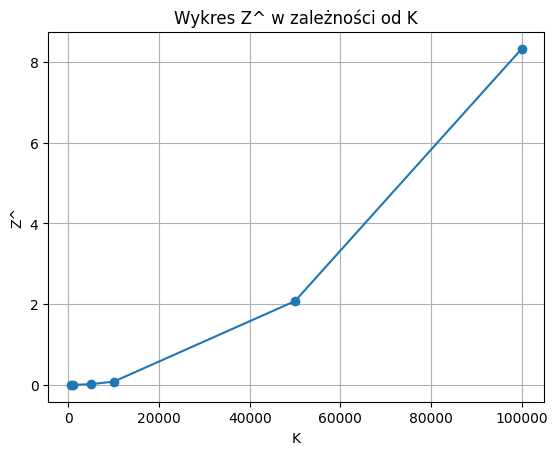

In [25]:
# Rysowanie wykresu
K.pop(0)
plt.plot(K, z_dash, marker='o')
plt.xlabel('K')
plt.ylabel('Z^')
plt.title('Wykres Z^ w zależności od K')
plt.grid(True)
plt.show()